In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
# file to load
data_men = "../Resources/all_mens_matches.csv"
data_women = "../Resources/all_womens_matches.csv"

#Read in CSV
atp_data = pd.read_csv(data_men)
wta_data = pd.read_csv(data_women)

In [3]:
# Fix wta_data column name 'Loser_HandWinner_Country' to 'Loser_Hand'
wta_data = wta_data.rename(columns={'Loser_HandWinner_Country':'Loser_Hand'})

In [4]:
# Drop rows that contain string value 'U' in 'Winner_Hand' and 'Loser_Hand'
atp_u = atp_data[atp_data['Winner_Hand'].str.contains('U')==False]
atp_u2 = atp_u[atp_u['Loser_Hand'].str.contains('U')==False]
# Remove rows with Blank/NaN values in any column of dataframe
atp_data2 = atp_u2.copy()
atp_data2.dropna(inplace=True)

In [5]:
# Drop rows that contain string value 'U' in 'Winner_Hand' and 'Loser_Hand'
wta_u = wta_data[wta_data['Winner_Hand'].str.contains('U')==False]
wta_u2 = wta_u[wta_u['Loser_Hand'].str.contains('U')==False]
# Remove rows with Blank/NaN values in any column of dataframe
wta_data2 = wta_u2.copy()
wta_data2.dropna(inplace=True)

In [6]:
atp_hand = atp_data2["Winner_Hand"]
atp_hand.value_counts()

R    10787
L     1738
Name: Winner_Hand, dtype: int64

In [7]:
wta_hand = wta_data2["Winner_Hand"]
wta_hand.value_counts()

R    10652
L     1004
Name: Winner_Hand, dtype: int64

# ATP Hand by Winners (Mens)

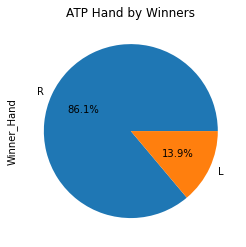

In [8]:
# Pie Chart
atp_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ATP Hand by Winners")

# save figure
plt.savefig("../Fred/ATP Hand by Winners (Mens).png")

plt.show()


# WTA Hand by Winners (Womens)

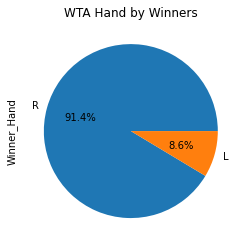

In [9]:
# Pie Chart
wta_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("WTA Hand by Winners")

# save figure
plt.savefig("../Fred/WTA Hand by Winners (Womens).png")

plt.show()


# ATP - Top 16 Hand by Winners (Quarterfinals and up)

In [10]:
atp_top16_df = atp_data2.loc[atp_data2["Tournament_Placement"].isin(["F","SF","QF"])]

In [11]:
atp_top16_hand = atp_top16_df["Winner_Hand"]
atp_top16_hand.value_counts()

R    1776
L     280
Name: Winner_Hand, dtype: int64

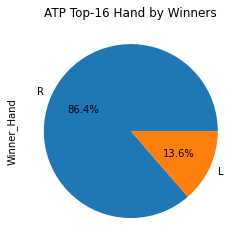

In [12]:
# Pie Chart
atp_top16_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ATP Top-16 Hand by Winners")

# save figure
plt.savefig("../Fred/ATP Top-16 Hand by Winners (Quarterfinals and up).png")

plt.show()


# ATP Other Hand by Winners (Below Quarterfinals)

In [13]:
atp_other_df = atp_data2.loc[atp_data2["Tournament_Placement"].isin(["RR","R128","R64","R32","R16","BR"])]

In [14]:
atp_other_hand = atp_other_df["Winner_Hand"]
atp_other_hand.value_counts()

R    9011
L    1458
Name: Winner_Hand, dtype: int64

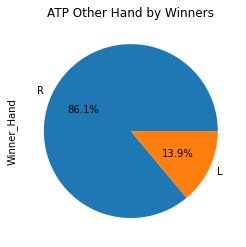

In [15]:
# Pie Chart
atp_other_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ATP Other Hand by Winners")

# save figure
plt.savefig("../Fred/ATP Other Hand by Winners (Below Quarterfinals).png")

plt.show()


# WTA Top 16 Hand by Winners (Quarterfinals and up)

In [16]:
wta_top16_df = wta_data2.loc[wta_data2["Tournament_Placement"].isin(["F","SF","QF"])]

In [17]:
wta_top16_hand = wta_top16_df["Winner_Hand"]
wta_top16_hand.value_counts()

R    1636
L     149
Name: Winner_Hand, dtype: int64

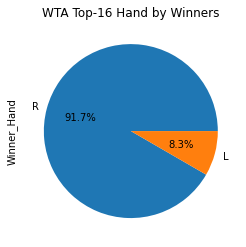

In [18]:
# Pie Chart
wta_top16_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("WTA Top-16 Hand by Winners")

# save figure
plt.savefig("../Fred/WTA Top 16 Hand by Winners (Quarterfinals and up).png")

plt.show()


# WTA Other Hand by Winners (Below Quarterfinals)

In [19]:
wta_other_df = wta_data2.loc[wta_data2["Tournament_Placement"].isin(["RR","R128","R64","R32","R16","BR"])]

In [20]:
wta_other_hand = wta_other_df["Winner_Hand"]
wta_other_hand.value_counts()

R    9016
L     855
Name: Winner_Hand, dtype: int64

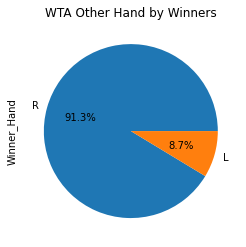

In [21]:
# Pie Chart
wta_other_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("WTA Other Hand by Winners")

# save figure
plt.savefig("../Fred/WTA Other Hand by Winners (Below Quarterfinals).png")

plt.show()


# ATP Right Hander Win Rate (vs. Left Hander)

In [22]:
len(atp_data2)

12525

In [23]:
atp_right = atp_data2.loc[(atp_data2["Winner_Hand"]=="R") & (atp_data2["Loser_Hand"]=="L")]
atp_right2 = atp_data2.loc[(atp_data2["Winner_Hand"]=="L") & (atp_data2["Loser_Hand"]=="R")]
r_o_l = round(len(atp_right) / len(atp_data2),2) * 100
l_o_r = round(len(atp_right2) / len(atp_data2),2) * 100

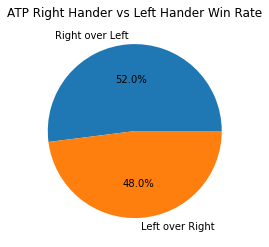

In [24]:
# Pie Chart
newlist = [r_o_l, l_o_r]
newlabels = ["Right over Left","Left over Right"]

plt.title("ATP Right Hander vs Left Hander Win Rate")
plt.pie(newlist, labels=newlabels, autopct="%1.1f%%")

# save figure
plt.savefig("../Fred/ATP Right Hander Win Rate (vs. Left Hander).png")

# WTA Right Hander Win Rate (vs. Left Hander)

In [25]:
len(wta_data2)

11656

In [26]:
wta_right = wta_data2.loc[(wta_data2["Winner_Hand"]=="R") & (wta_data2["Loser_Hand"]=="L")]
wta_right2 = wta_data2.loc[(wta_data2["Winner_Hand"]=="L") & (wta_data2["Loser_Hand"]=="R")]
r_o_l3 = round(len(wta_right) / len(wta_data2),2) * 100
l_o_r3 = round(len(wta_right2) / len(wta_data2),2) * 100

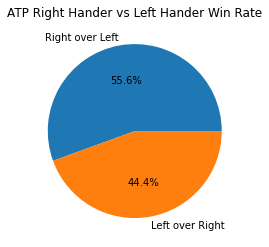

In [27]:
# Pie Chart
newlist3 = [r_o_l3, l_o_r3]
newlabels3 = ["Right over Left","Left over Right"]

plt.title("ATP Right Hander vs Left Hander Win Rate")
plt.pie(newlist3, labels=newlabels3, autopct="%1.1f%%")

# save figure
plt.savefig("../Fred/WTA Right Hander Win Rate (vs. Left Hander).png")

# ATP / WTA Left-hander vs. Right-hander Win Rate
* Hypothesis : Left-handers have competitive advantage over Right-handers.
* Observation : Left-handers do NOT have competitive advantage over Right-handers.

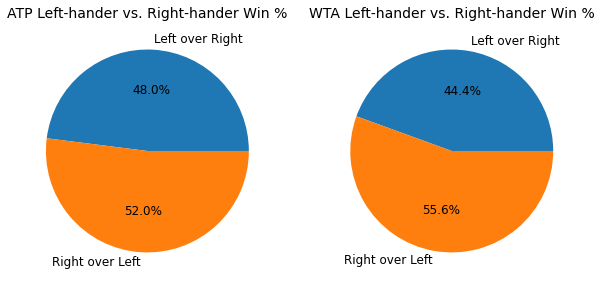

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

labels = ["Left over Right","Right over Left"]
values = [l_o_r, r_o_l]
ax1.pie(values, labels=labels, autopct="%1.1f%%", textprops={"fontsize":12})
ax1.set_title("ATP Left-hander vs. Right-hander Win %", fontsize=14)

labels = ["Left over Right","Right over Left"]
values = [l_o_r3, r_o_l3]
ax2.pie(values, labels=labels, autopct="%1.1f%%", textprops={"fontsize":12})
ax2.set_title("WTA Left-hander vs. Right-hander Win %", fontsize=14)

# save figure
plt.savefig("../Output/Left-hander vs. Right-hander Win Rate.png")